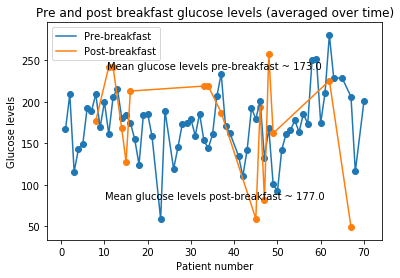

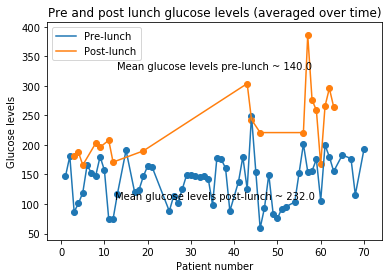

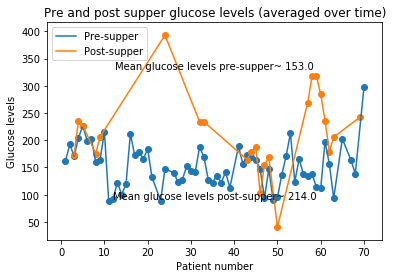

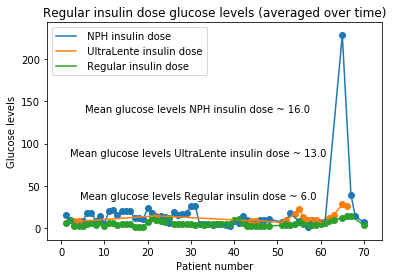

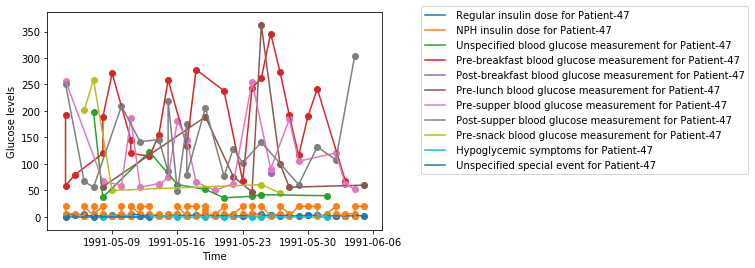

In [1]:
### Importing the necessary libraries 
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.ticker as plticker
import re
#### Importing the dataset 
##### The dataset has been obtained from 
##### https://archive.ics.uci.edu/ml/datasets/diabetes

### Local location of the dataset
### Glucose levels are monitored for 70 patients. 
### The Glucose levels are adminitered over various times of the day..\
#pre breakfast/post breakfast etc
### and also after an insluin dose. 
location='Diabetes-Data/data-'
code_location='Diabetes-Data/Data-Codes'
code_df = pd.read_csv(code_location, sep="=", comment="#", \
                      skip_blank_lines=True,header=None).dropna()
code_df.columns=['Code','Description']
code_df[['Code']] = code_df[['Code']].apply(pd.to_numeric)
code_df_dict = dict(zip(code_df.Code, code_df.Description))
patents_numb=["%.2d" % i for i in range(1,71)]
total_patient_daily_data=pd.DataFrame()
sugar_data=pd.DataFrame()
### Generating a big dataframe combining  all the datasets
for index in range(len(patents_numb)):
    data_grped=pd.DataFrame()
    data=pd.read_csv(''.join([location,patents_numb[index]]), sep='\t',header=None)
    data['Patient']=''.join(['Patient-',patents_numb[index]])
    data = data.reset_index(drop=True)
    data.index=data['Patient']
    del data['Patient']
    data.columns=['Day','Time','Code','Value']
    data.Value = pd.to_numeric(data.Value, errors='coerce')
    data.loc[:,'Month']=pd.to_datetime(data['Day'])[:].dt.month
    data.loc[:,'Year']=pd.to_datetime(data['Day'])[:].dt.year
    data.loc[:,'day']=pd.to_datetime(data['Day'])[:].dt.day
    data['Description'] = data['Code'].map(code_df_dict)
    data = data[data['Code'].isin(code_df_dict.keys())]
    total_patient_daily_data=total_patient_daily_data.\
    append(data.loc[:,['Value','Code','Time','Description','day','Month','Year']],\
           ignore_index=False)
    data=data.loc[:,['Value','Code','Description','Month','Year']]
    #print data.head()
    data_grped=data.groupby(['Month','Year','Code','Description']).mean()
    data_grped['Patient']=''.join(['Patient-',patents_numb[index]])
    sugar_data=sugar_data.append(data_grped,ignore_index=False)
   
   
    # 

sugar_data.reset_index(inplace=True)
sugar_data.index=sugar_data['Patient']
del sugar_data['Patient']
sugar_data['-']='-'
sugar_data['Month-Year'] = sugar_data['Month'].astype(str) + sugar_data['-']+sugar_data['Year'].astype(str)
del sugar_data['-']
del sugar_data['Month']
del sugar_data['Year']

### The combined data-frame for all the patients where the glucose level is recorded as a monthly mean
df_split={x: sugar_data.loc[x]  for x in sugar_data.index.unique()}




#### Generating an inverse dictionary to get the corresponding description of the Codes
inv_code_df_dict = dict((v, k) for k, v in code_df_dict.iteritems())


#### Function to retrieve unique patient numbers belonging to a certain value of the Code

def get_patients_numbers(cod_val):
    strng=sugar_data[sugar_data['Code']==cod_val]['Value'].index.tolist()
    patnt_numb=[]
    for x in range(len(strng)):
        temp=int(str(map(int, re.findall('\d+', strng[x])[0])[0])\
                 +str(map(int, re.findall('\d+', strng[x])[0])[1]))
        patnt_numb.append(temp)
    return patnt_numb

def get_unique_patient(cod_val):
    patient_unique = []
    [patient_unique.append(x) for x in get_patients_numbers(cod_val) if x not in patient_unique]
    return patient_unique


### Extracting the mean glucose levels corresponding to certain activities.
#### NB: In the following the glucose levels are averaged over years too and 
#### the glucose levels are recorded as a mean value for each individual patient 
#### for the corresponding value of the Code

### Pre and post breakfast measurement
fig, ax = subplots()
cod_val_1=inv_code_df_dict[' Pre-breakfast blood glucose measurement']
cod_val_2=inv_code_df_dict[' Post-breakfast blood glucose measurement']
pre_bkfast_patn_num=get_unique_patient(cod_val_1)
avg_glucose_prebkfst=sugar_data[sugar_data['Code']==cod_val_1].\
groupby(sugar_data[sugar_data['Code']==cod_val_1].index).mean()
pst_bkfast_patn_num=get_unique_patient(cod_val_2)
avg_glucose_postbkfst=sugar_data[sugar_data['Code']==cod_val_2].\
groupby(sugar_data[sugar_data['Code']==cod_val_2].index).mean()
glucose_val_preb=avg_glucose_prebkfst.Value.tolist()
glucose_val_pstb=avg_glucose_postbkfst.Value.tolist()
ax.plot(pre_bkfast_patn_num,glucose_val_preb,label='Pre-breakfast')
scatter(pre_bkfast_patn_num,glucose_val_preb)
ax.plot(pst_bkfast_patn_num,glucose_val_pstb,label='Post-breakfast')
scatter(pst_bkfast_patn_num,glucose_val_pstb)
xlabel('Patient number')
ylabel('Glucose levels')
title('Pre and post breakfast glucose levels (averaged over time)')
legend = ax.legend(loc='upper left', shadow=False)
text(0.5, 0.8,'Mean glucose levels pre-breakfast ~ '+str(round(np.mean(glucose_val_preb))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
text(0.5, 0.2,'Mean glucose levels post-breakfast ~ '+str(round(np.mean(glucose_val_pstb))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
show()


### Pre and post lunch measurement
fig, ax = subplots()
cod_val_1=inv_code_df_dict[' Pre-lunch blood glucose measurement']
cod_val_2=inv_code_df_dict[' Post-lunch blood glucose measurement']

pre_lunch_patn_num=get_unique_patient(cod_val_1)
avg_glucose_prelunch=sugar_data[sugar_data['Code']==cod_val_1].\
groupby(sugar_data[sugar_data['Code']==cod_val_1].index).mean()
pst_lunch_patn_num=get_unique_patient(cod_val_2)
avg_glucose_postlunch=sugar_data[sugar_data['Code']==cod_val_2].\
groupby(sugar_data[sugar_data['Code']==cod_val_2].index).mean()
glucose_val_prel=avg_glucose_prelunch.Value.tolist()
glucose_val_pstl=avg_glucose_postlunch.Value.tolist()
ax.plot(pre_lunch_patn_num,glucose_val_prel,label='Pre-lunch')
scatter(pre_lunch_patn_num,glucose_val_prel)
ax.plot(pst_lunch_patn_num,glucose_val_pstl,label='Post-lunch')
scatter(pst_lunch_patn_num,glucose_val_pstl)
xlabel('Patient number')
ylabel('Glucose levels')
title('Pre and post lunch glucose levels (averaged over time)')
legend = ax.legend(loc='upper left', shadow=False)
text(0.5, 0.8,'Mean glucose levels pre-lunch ~ '+str(round(np.mean(glucose_val_prel))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
text(0.5, 0.2,'Mean glucose levels post-lunch ~ '+str(round(np.mean(glucose_val_pstl))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
show()



### Pre and post supper measurement
fig, ax = subplots()
cod_val_1=inv_code_df_dict[' Pre-supper blood glucose measurement']
cod_val_2=inv_code_df_dict[' Post-supper blood glucose measurement']

pre_supper_patn_num=get_unique_patient(cod_val_1)
avg_glucose_presupper=sugar_data[sugar_data['Code']==cod_val_1].\
groupby(sugar_data[sugar_data['Code']==cod_val_1].index).mean()
pst_supper_patn_num=get_unique_patient(cod_val_2)
avg_glucose_postsupper=sugar_data[sugar_data['Code']==cod_val_2].\
groupby(sugar_data[sugar_data['Code']==cod_val_2].index).mean()
glucose_val_pres=avg_glucose_presupper.Value.tolist()
glucose_val_psts=avg_glucose_postsupper.Value.tolist()
ax.plot(pre_supper_patn_num,glucose_val_pres,label='Pre-supper')
scatter(pre_supper_patn_num,glucose_val_pres)
ax.plot(pst_supper_patn_num,glucose_val_psts,label='Post-supper')
scatter(pst_supper_patn_num,glucose_val_psts)
xlabel('Patient number')
ylabel('Glucose levels')
title('Pre and post supper glucose levels (averaged over time)')
legend = ax.legend(loc='upper left', shadow=False)
text(0.5, 0.8,'Mean glucose levels pre-supper~ '+str(round(np.mean(glucose_val_pres))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
text(0.5, 0.2,'Mean glucose levels post-supper~ '+str(round(np.mean(glucose_val_psts))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
show()


#### We can also contsruct a loop to seuquentially compute the glucose values 
#### for various Code values. 
actv_list=[' NPH insulin dose',' UltraLente insulin dose',' Regular insulin dose']

code_val_list=[]
for index in range(len(actv_list)):
    code_val_list.append(inv_code_df_dict[actv_list[index]])
    

glucose_levels_actv=[0] * len(actv_list)
glucose_levels_actv_num_patents=[0] * len(actv_list)



for index in range(len(actv_list)):
    cod_val_temp=code_val_list[index]
    glucose_levels_actv_num_patents[index]=get_unique_patient(cod_val_temp)
    avg_glucose_actv=sugar_data[sugar_data['Code']==cod_val_temp].\
    groupby(sugar_data[sugar_data['Code']==cod_val_temp].index).mean()
    glucose_levels_actv[index]=avg_glucose_actv.Value.tolist()

fig, ax = subplots()    
ax.plot(glucose_levels_actv_num_patents[0],glucose_levels_actv[0],label=actv_list[0])
scatter(glucose_levels_actv_num_patents[0],glucose_levels_actv[0])
ax.plot(glucose_levels_actv_num_patents[1],glucose_levels_actv[1],label=actv_list[1])
scatter(glucose_levels_actv_num_patents[1],glucose_levels_actv[1])
ax.plot(glucose_levels_actv_num_patents[2],glucose_levels_actv[2],label=actv_list[2])
scatter(glucose_levels_actv_num_patents[2],glucose_levels_actv[2])
xlabel('Patient number')
ylabel('Glucose levels')
title('Regular insulin dose glucose levels (averaged over time)')
legend = ax.legend(loc='upper left', shadow=False)
text(0.45, 0.6,'Mean glucose levels NPH insulin dose ~ '+str(round(np.mean(glucose_levels_actv[0]))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
text(0.45, 0.4,'Mean glucose levels UltraLente insulin dose ~ '+str(round(np.mean(glucose_levels_actv[1]))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
text(0.45, 0.2,'Mean glucose levels Regular insulin dose ~ '+str(round(np.mean(glucose_levels_actv[2]))),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes)
show()   



##### Extracting glucose level information for a certain patient 



def get_total_patient():
    total_patient = []
    [total_patient.append(x) for x in total_patient_daily_data.index if x not in total_patient]
    return total_patient

def get_daily_glucose_lvels(patent_numb):
    df_patient=total_patient_daily_data[total_patient_daily_data.index==patent_numb]
    return df_patient

patn_index=46;
dat_fm_patn=get_daily_glucose_lvels(get_total_patient()[patn_index])
#dat_fm_patn = dat_fm_patn[dat_fm_patn['Code'].isin(code_df_dict.keys())]


#print dat_fm_patn.head(50)
df_v2=dat_fm_patn.groupby(['Code','Time']).mean()
df_v2.day=df_v2['day'].astype(int)
df_v2.Month=df_v2['Month'].astype(int)
df_v2.Year=df_v2['Year'].astype(int)
df_v2['YMD']=pd.to_datetime(df_v2.Year*10000+df_v2.Month*100+df_v2.day,format='%Y%m%d')
#drop df['day','Month']
columns = ['day','Month','Year']
df_v2.drop(columns, inplace=True, axis=1)
df_v2=df_v2.sort_values('YMD')
tim_index= df_v2.index.get_level_values('Time').tolist()
cod_index= df_v2.index.get_level_values('Code').tolist()
cod_unique=sorted(list(set(cod_index)))
actv_uniqu=[]
for index in range(len(cod_unique)):
    actv_uniqu.append(code_df_dict[cod_unique[index]])
#print actv_uniqu
#pd.DataFrame()
glucose_val_list=[[]]*len(cod_unique)
time_list=[[]]*len(cod_unique)
for index in range(len(cod_unique)):
    glucose_val_list[index]=df_v2[df_v2.index.get_level_values('Code')==cod_unique[index]]['Value'].values
    time_list[index]=df_v2[df_v2.index.get_level_values('Code')==cod_unique[index]]['YMD'].values

    
fig, ax = subplots()
for index in range(len(cod_unique)):
    ax.plot(time_list[index],glucose_val_list[index],label=actv_uniqu[index]+' for '+get_total_patient()[patn_index])
    ax.scatter(time_list[index],glucose_val_list[index])
xlabel('Time')
ylabel('Glucose levels')
legend = ax.legend(bbox_to_anchor=(1.1, 1.05),shadow=False)
show()

